# **K-Means Clustering**

# **Neccessary Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")

# **Exploring the Dataset**

In [3]:
dataframe = pd.read_csv("Mall_Customers.csv")
dataframe.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
dataframe.shape

(200, 5)

In [7]:
dataframe.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
dataframe.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [10]:
dataframe.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


# **Data Visulization**

In [11]:
plt.style.use('fivethirtyeight')

# **Histograms**

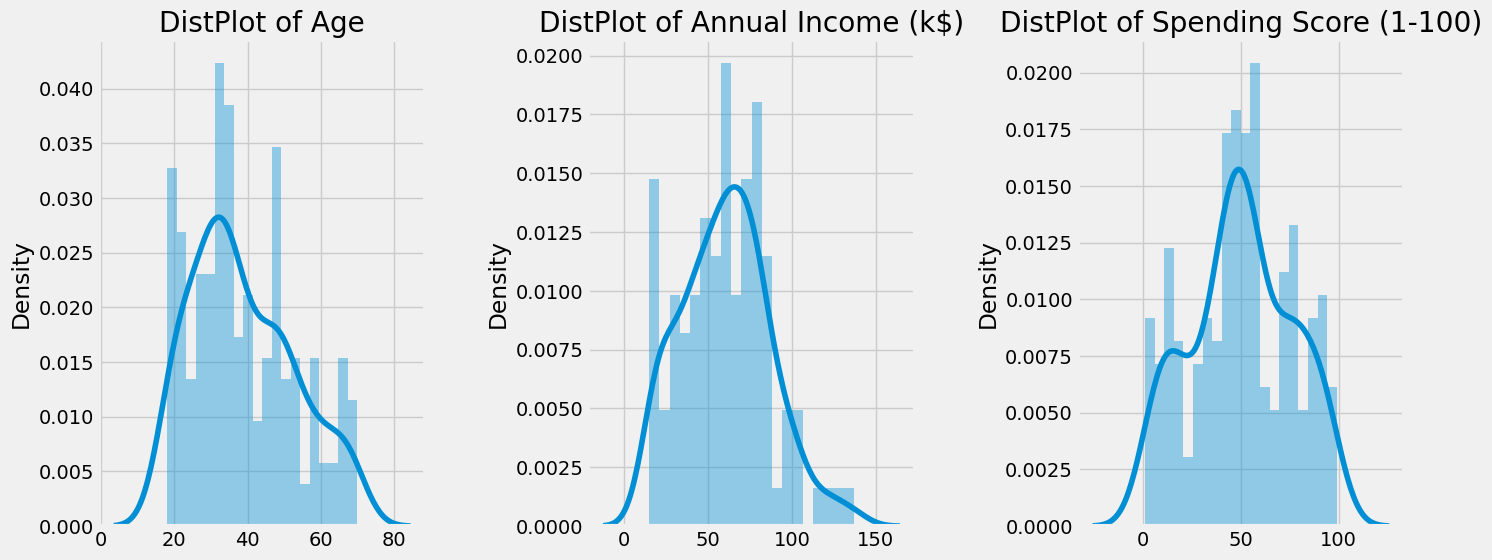

In [17]:
plt.figure(1, figsize=(15, 6))
iterator = 0
for i in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  iterator += 1
  plt.subplot(1, 3, iterator)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot([dataframe[i]], bins=20)
  plt.title('DistPlot of {}'.format(i))
plt.show()

# **Ploting the Count of Gender**

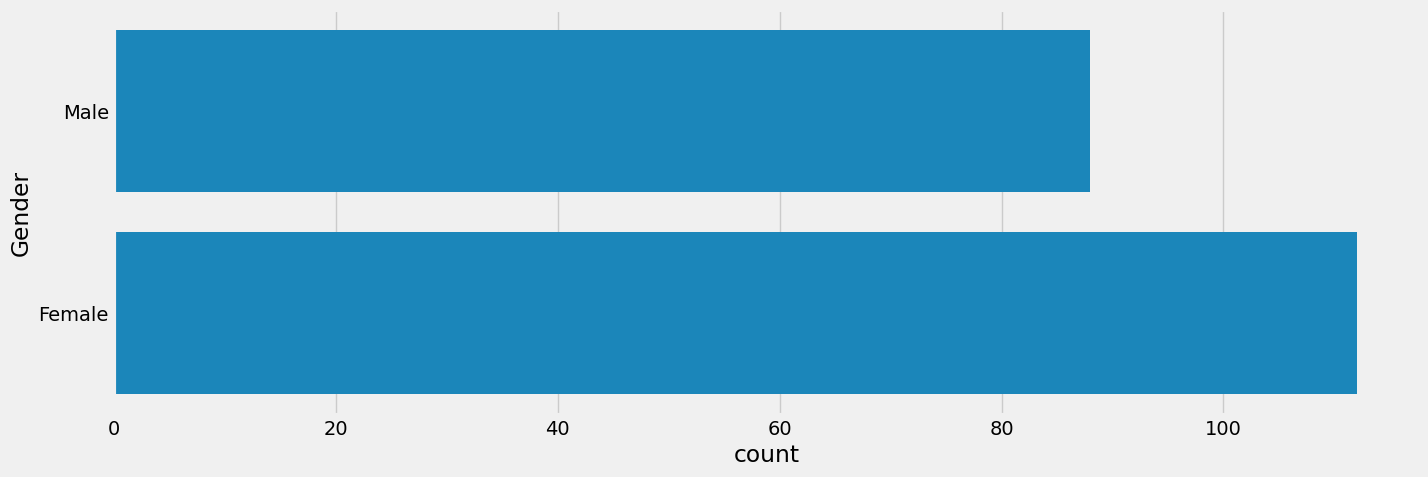

In [18]:
plt.figure(1, figsize=(15, 5))
sns.countplot(y='Gender', data = dataframe)
plt.show()

# **Plotting a relation between the Age, Annual Income (k$) and Spending Score**

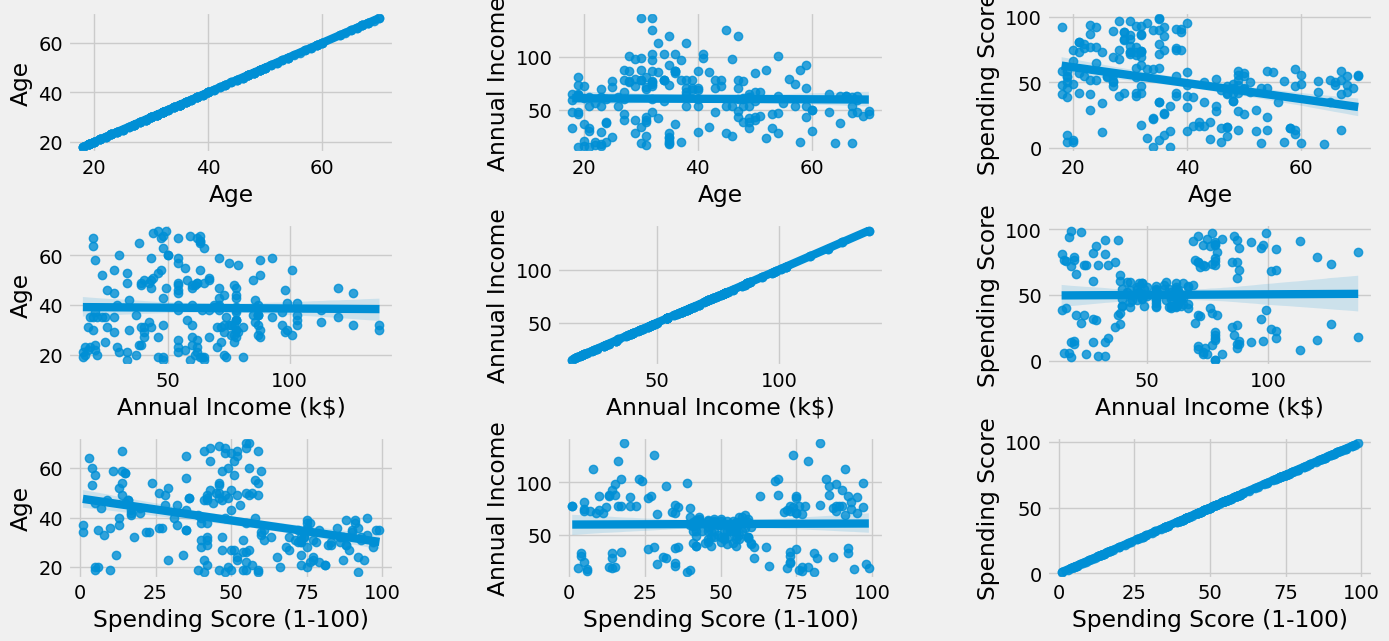

In [21]:
plt.figure(1, figsize=(15, 7))
iterartor = 0
for i in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  for j in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    iterartor += 1
    plt.subplot(3, 3, iterartor)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.regplot(x=i, y=j, data=dataframe)
    plt.ylabel(j.split()[0]+' '+j.split()[1] if len(j.split()) > 1 else j)
plt.show()

# **Age vs Annual Income with respect to gender**

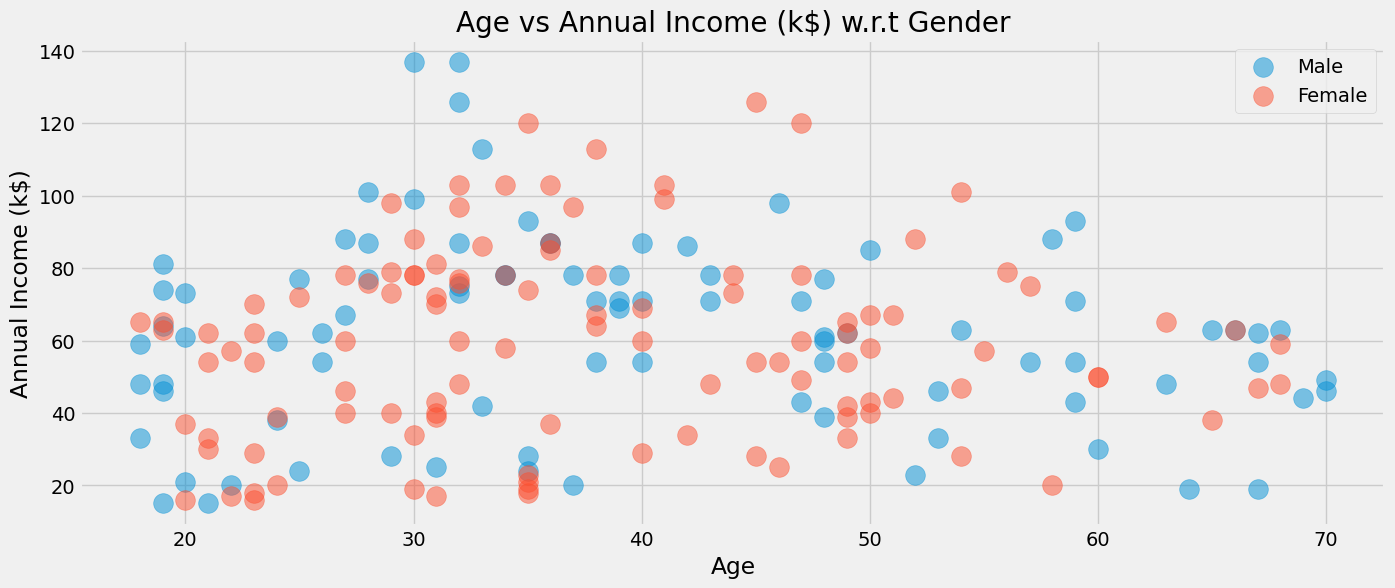

In [22]:
plt.figure(1, figsize=(15, 6))
for gender in ['Male', 'Female']:
  plt.scatter(x = 'Age', y = 'Annual Income (k$)', data = dataframe[dataframe['Gender'] == gender], s = 200, alpha=0.5, label=gender)
  plt.xlabel('Age')
  plt.ylabel('Annual Income (k$)')
  plt.title('Age vs Annual Income (k$) w.r.t Gender')
  plt.legend()
plt.show()

# **Distribution of values in Age , Annual Income and Spending Score according to Gender**

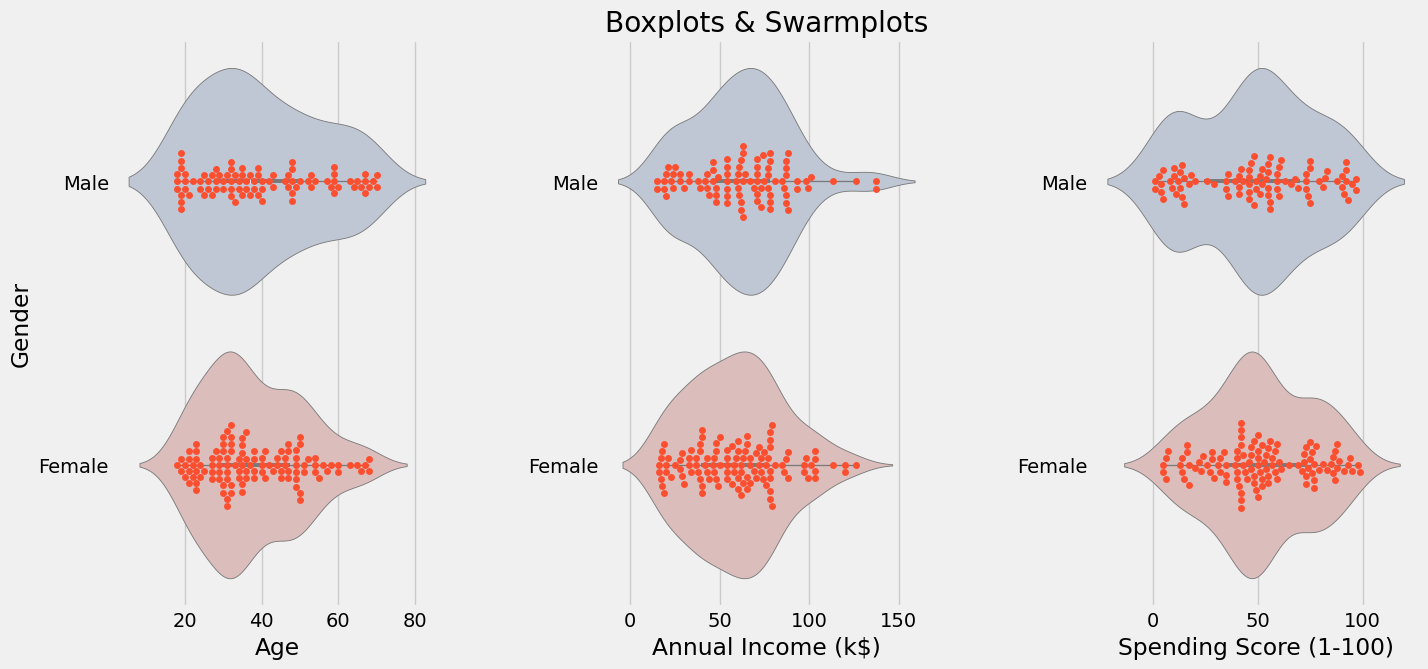

In [24]:
plt.figure(1 , figsize = (15 , 7))
n = 0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = dataframe , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = dataframe)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

# **Clustering Using K-Means**

# **Creating Segmentations using Age and Spending Score**

In [26]:
Y1 = dataframe[['Age', 'Spending Score (1-100)']].iloc[:, :].values
segmented_inertia = []
for x in range(1, 11):
  algorithm = (KMeans(n_clusters = x, init = 'k-means++',n_init = 10, max_iter=300,
                      tol= 0.0001, random_state =111, algorithm='elkan'))
  algorithm.fit(Y1)
  segmented_inertia.append(algorithm.inertia_)

# **Selction of N number of clusters based on Squared Distance between Centroids and data points**

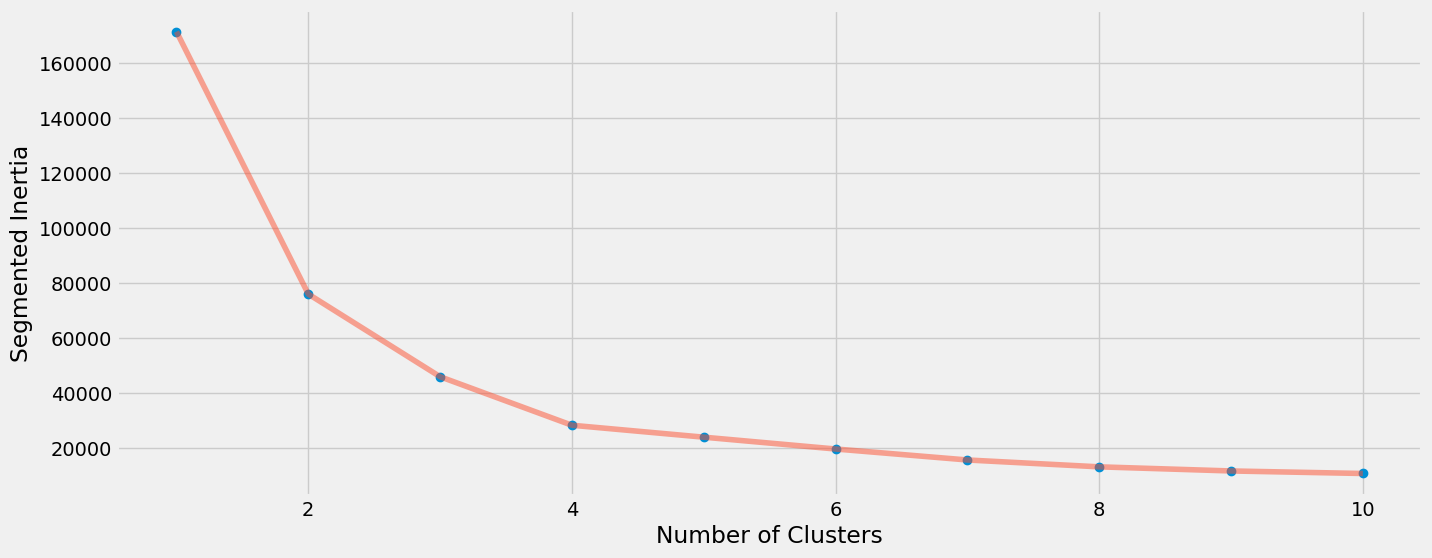

In [27]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), segmented_inertia, 'o')
plt.plot(np.arange(1, 11), segmented_inertia, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Segmented Inertia')
plt.show()

In [28]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(Y1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [31]:
h = 0.02
x_min, x_max = Y1[:, 0].min() - 1, Y1[:, 0].max() + 1
y_min, y_max = Y1[:, 1].min() - 1, Y1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

(Text(0, 0.5, 'Spending Score (1-100)'), Text(0.5, 0, 'Age'))

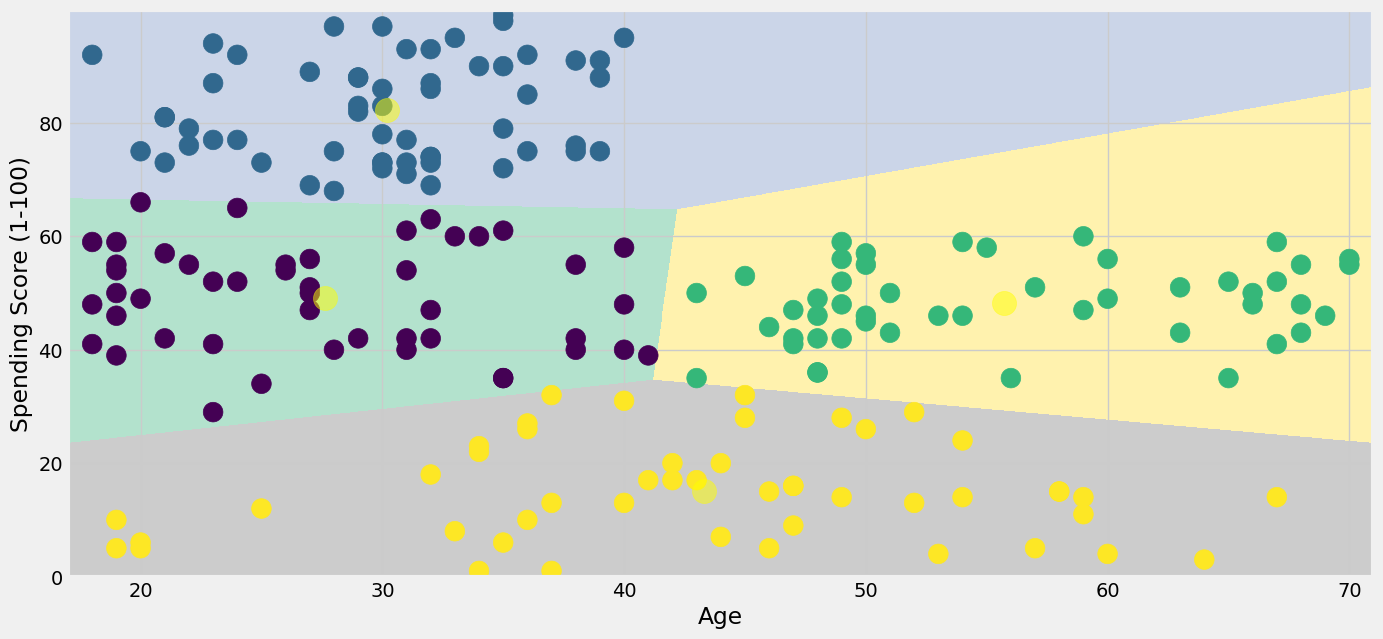

In [33]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = dataframe , c = labels1 ,
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'yellow' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')

# **Segmentation using Annual Income and Spending Score**

In [36]:
Y2 = dataframe[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
segmented_inertia = []
for x in range(1 , 11):
    algorithm = (KMeans(n_clusters = x ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(Y2)
    segmented_inertia.append(algorithm.inertia_)

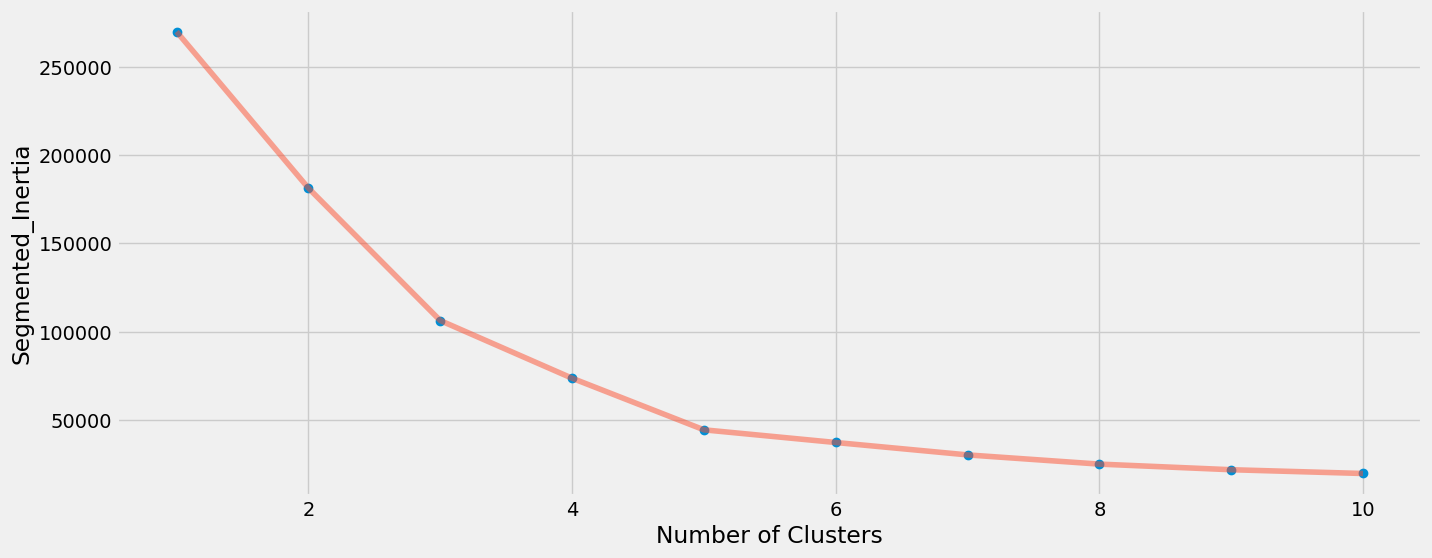

In [37]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , segmented_inertia , 'o')
plt.plot(np.arange(1 , 11) , segmented_inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Segmented_Inertia')
plt.show()

In [38]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(Y2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [39]:
h = 0.02
x_min, x_max = Y2[:, 0].min() - 1, Y2[:, 0].max() + 1
y_min, y_max = Y2[:, 1].min() - 1, Y2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

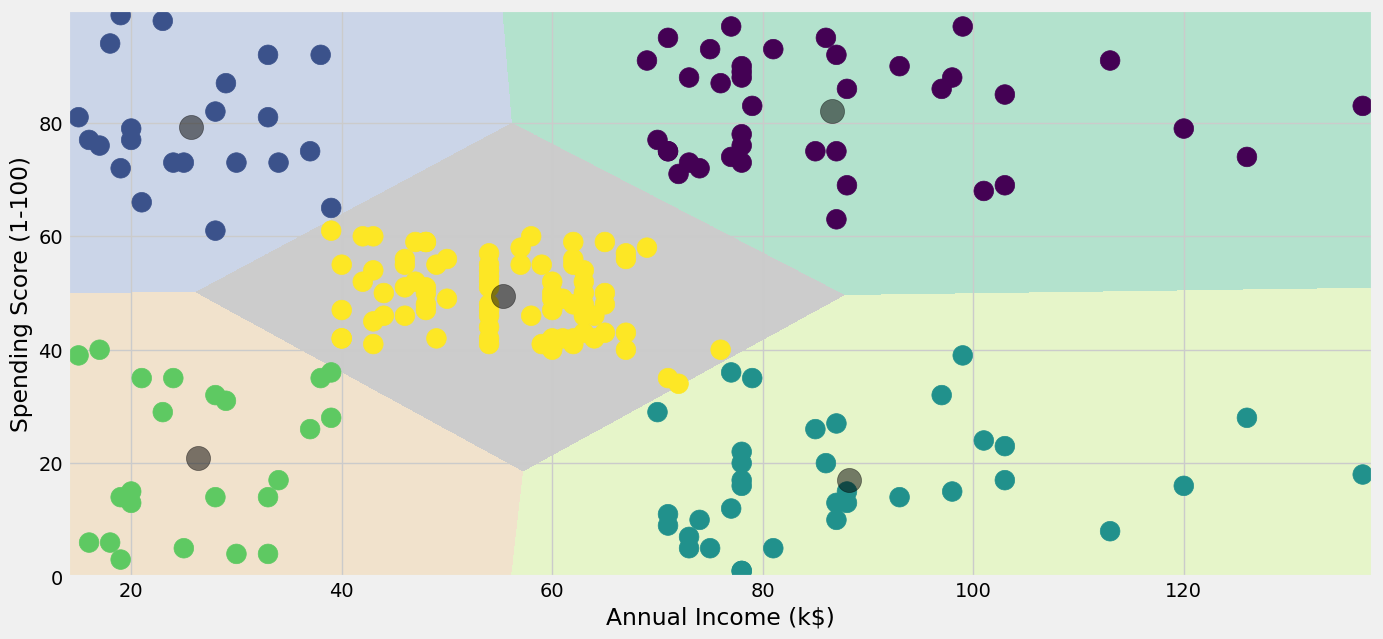

In [41]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = dataframe , c = labels2 ,
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'black' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

# **Selecting the Features for Model**

In [43]:
dataframe.head(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [50]:
X = dataframe.iloc[:, [3, 4]].values

# **Buliding a Model**

# **Using K-Means Algorithm to decide the optimum Cluster**

In [51]:
from sklearn.cluster import KMeans
w_clist=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    w_clist.append(kmeans.inertia_)

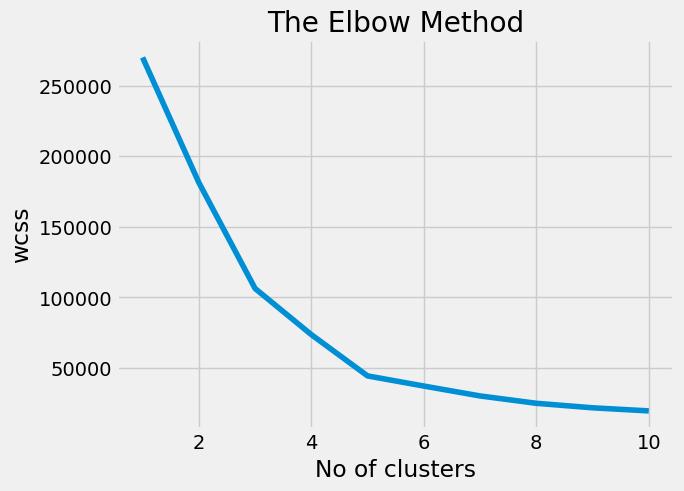

In [52]:
plt.plot(range(1,11), w_clist)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.show()

In [53]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

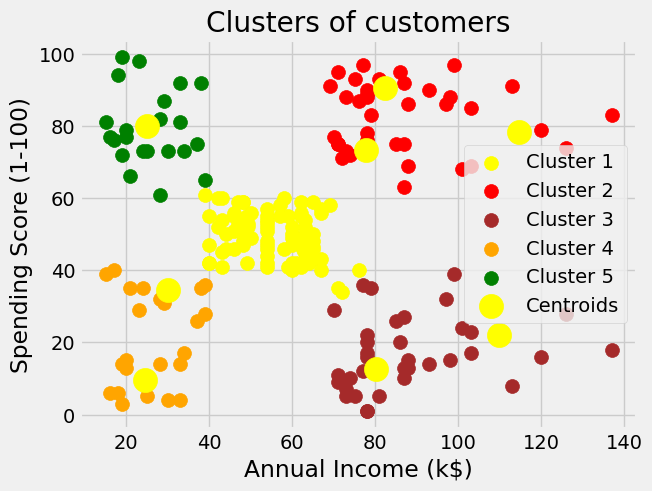

In [54]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'brown', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'green', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()